In [395]:
#Importing Dependencies

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import re
import json
import requests
import gmaps
import gmaps
import gmaps.datasets

Store Listings CSV into DataFrame

In [396]:
Original_Listings_df = pd.read_csv("listings.csv", encoding="utf8")
Original_Listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20200820034003,2020-08-21,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,NaN,NaN,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",f,f,"Bulleen, Victoria, Australia",Manningham,NaN,-37.77268,145.09213,Private room in house,Private room,2,NaN,1 bath,1.0,2.0,"[""Wifi""]",$60.00,1,365,1,4,365,365,1.2,365.0,NaN,t,30,60,90,365,2020-08-21,4,0,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,1,0,1,0,0.04
1,10803,https://www.airbnb.com/rooms/10803,20200820034003,2020-08-20,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/31323790/90b6...,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, Victoria, Australia",Moreland,NaN,-37.76651,144.98074,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,2.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Lock on bedro...",$31.00,4,14,4,4,14,14,4.0,14.0,NaN,t,1,1,1,1,2020-08-20,145,16,0,2013-01-12,2020-04-08,89.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,1.57
2,12936,https://www.airbnb.com/rooms/12936,20200820034003,2020-08-20,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,The A2C Team,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,96%,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,St Kilda,13.0,13.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"St Kilda, Victoria, Australia",Port Phillip,NaN,-37.85999,144.97662,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""TV"", ""Dishes and silverware"", ""Air ...",$95.00,3,14,3,4,14,14,3.1,14.0,NaN,t,0,0,0,0,2020-08-20,42,12,0,2010-08-04,2020-03-15,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,10,10,0,0,0.34
3,38271,https://www.airbnb.com/rooms/38271,20200820034003,

Making a Copy of the Original DataFrame to Listings_df

In [397]:
Listings_df = Original_Listings_df.copy()

In [398]:
Listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20200820034003,2020-08-21,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,NaN,NaN,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",f,f,"Bulleen, Victoria, Australia",Manningham,NaN,-37.77268,145.09213,Private room in house,Private room,2,NaN,1 bath,1.0,2.0,"[""Wifi""]",$60.00,1,365,1,4,365,365,1.2,365.0,NaN,t,30,60,90,365,2020-08-21,4,0,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,1,0,1,0,0.04
1,10803,https://www.airbnb.com/rooms/10803,20200820034003,2020-08-20,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/31323790/90b6...,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, Victoria, Australia",Moreland,NaN,-37.76651,144.98074,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,2.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Lock on bedro...",$31.00,4,14,4,4,14,14,4.0,14.0,NaN,t,1,1,1,1,2020-08-20,145,16,0,2013-01-12,2020-04-08,89.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,1.57
2,12936,https://www.airbnb.com/rooms/12936,20200820034003,2020-08-20,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,The A2C Team,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,96%,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,St Kilda,13.0,13.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"St Kilda, Victoria, Australia",Port Phillip,NaN,-37.85999,144.97662,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""TV"", ""Dishes and silverware"", ""Air ...",$95.00,3,14,3,4,14,14,3.1,14.0,NaN,t,0,0,0,0,2020-08-20,42,12,0,2010-08-04,2020-03-15,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,10,10,0,0,0.34
3,38271,https://www.airbnb.com/rooms/38271,20200820034003,

In [399]:
pd.set_option('display.max_columns', len(Listings_df.columns)) 
pd.set_option('display.max_rows', 500)

In [400]:
#Determining the Null Value Data from the main dataset
round(( Listings_df.isna().sum()/len(Listings_df) ) * 100).sort_values(ascending=False)

neighbourhood_group_cleansed                    100.0
license                                         100.0
bathrooms                                       100.0
calendar_updated                                100.0
host_response_rate                               47.0
host_response_time                               47.0
host_neighbourhood                               42.0
host_about                                       40.0
neighbourhood                                    35.0
neighborhood_overview                            35.0
host_acceptance_rate                             27.0
review_scores_rating                             24.0
review_scores_accuracy                           24.0
review_scores_cleanliness                        24.0
review_scores_checkin                            24.0
review_scores_communication                      24.0
review_scores_location                           24.0
review_scores_value                              24.0
last_review                 

In [401]:
Listings_df = Listings_df.drop (['calendar_last_scraped',
                                 'number_of_reviews_l30d', 'picture_url', 
                                 'last_scraped', 'scrape_id', 'calculated_host_listings_count',
                                 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                                 'calculated_host_listings_count_shared_rooms', 
                                 'maximum_nights_avg_ntm',
                                 'host_total_listings_count', 
                                 'bathrooms_text',
                                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                                 'maximum_maximum_nights', 'minimum_nights_avg_ntm'], axis =1)

Creating New data frame for Host Related Columns

In [402]:
Futuristic_Airbnb_Hosts_df = Listings_df[["host_id","host_url","host_name","host_about",
                                          "host_since","host_location","host_response_time",
                                          "host_response_rate","host_is_superhost","host_thumbnail_url","host_picture_url",
                                          "host_listings_count","host_has_profile_pic","host_neighbourhood",
                                          "host_identity_verified"]].copy()
Futuristic_Airbnb_Hosts_df.head()

,host_id,host_url,host_name,host_about,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_has_profile_pic,host_neighbourhood,host_identity_verified
0,33057,https://www.airbnb.com/users/show/33057,Manju,About us: We are an East Indian couple in our ...,2009-08-21,AU,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,1.0,f,NaN,f
1,38901,https://www.airbnb.com/users/show/38901,Lindsay,As an artist working in animation and video I ...,2009-09-16,"Melbourne, Victoria, Australia",within a few hours,100%,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,1.0,t,Brunswick,t
2,50121,https://www.airbnb.com/users/show/50121,The A2C Team,NaN,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,13.0,t,St Kilda,t
3,164193,https://www.airbnb.com/users/show/164193,Daryl & Dee,We are an active couple who work from home and...,2010-07-12,"Berwick, Victoria, Australia",within an hour,100%,t,https://a0.muscache.com/im/pictures/user/29c38...,https://a0.muscache.com/im/pictures/user/29c38...,1.0,t,NaN,t
4,182833,https://www.airbnb.com/users/show/182833,Diana,"We all travellers on this planet, if my place ...",2010-07-27,"Melbourne, Victoria, Australia",NaN,NaN,f,https://a0.muscache.com/im/users/182833/profil...,https://a0.muscache.com/im/users/182833/profil...,3.0,t,NaN,t


In [403]:
#Checking the Number of Rows
len(Futuristic_Airbnb_Hosts_df)

20420

Cleaning the Host DataFrame

In [404]:
#Checking if any Null Value Data in Host Related Columns
round(( Futuristic_Airbnb_Hosts_df.isna().sum()/len(Futuristic_Airbnb_Hosts_df) ) * 100).sort_values(ascending=False)

host_response_time        47.0
host_response_rate        47.0
host_neighbourhood        42.0
host_about                40.0
host_id                    0.0
host_url                   0.0
host_name                  0.0
host_since                 0.0
host_location              0.0
host_is_superhost          0.0
host_thumbnail_url         0.0
host_picture_url           0.0
host_listings_count        0.0
host_has_profile_pic       0.0
host_identity_verified     0.0
dtype: float64

In [405]:
#Filling N/A Values With Some Relevant Values
Futuristic_Airbnb_Hosts_df["host_about"].fillna("Information Not Available", inplace = True) 
Futuristic_Airbnb_Hosts_df["host_neighbourhood"].fillna("Information Not Available", inplace = True) 
Futuristic_Airbnb_Hosts_df["host_response_rate"].fillna("0%", inplace = True) 
Futuristic_Airbnb_Hosts_df["host_response_time"].fillna("Information Not Available", inplace = True) 

In [406]:
#Re-Checking if any Null Value Data in Host Related Columns
round(( Futuristic_Airbnb_Hosts_df.isna().sum()/len(Futuristic_Airbnb_Hosts_df) ) * 100).sort_values(ascending=False)

host_id                   0.0
host_url                  0.0
host_name                 0.0
host_about                0.0
host_since                0.0
host_location             0.0
host_response_time        0.0
host_response_rate        0.0
host_is_superhost         0.0
host_thumbnail_url        0.0
host_picture_url          0.0
host_listings_count       0.0
host_has_profile_pic      0.0
host_neighbourhood        0.0
host_identity_verified    0.0
dtype: float64

In [407]:
#Removing % in Host Response Rate Column and converting to Numeric
Futuristic_Airbnb_Hosts_df['host_response_rate'] = pd.to_numeric(Futuristic_Airbnb_Hosts_df.host_response_rate.str.strip('%'))

In [408]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Hosts_df["host_is_superhost"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Hosts_df["host_has_profile_pic"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Hosts_df["host_identity_verified"].replace(["t","f"],[True,False],inplace=True)

In [409]:
#Data Cleanup for Host_Since Column : Converting to DateTime Column

Futuristic_Airbnb_Hosts_df.host_since = pd.to_datetime(Futuristic_Airbnb_Hosts_df.host_since)

In [410]:
#Data Cleanup for Host_About Column

Futuristic_Airbnb_Hosts_df["host_about"]=Futuristic_Airbnb_Hosts_df["host_about"].replace({'\n': '', '\r':''}, regex=True)

In [411]:
#Data Cleanup for Host_Location Column
Futuristic_Airbnb_Hosts_df["host_location"]=Futuristic_Airbnb_Hosts_df["host_location"].replace({'Traveling across the country and when I\'m not doing that, at my home on' :'','IN':'India'}, regex=True)
Futuristic_Airbnb_Hosts_df["host_location"]=Futuristic_Airbnb_Hosts_df["host_location"].replace({'US' :'United States','CA' :'Canada','JP':'Japan','CN':'China','AU':'Australia','KR':'Korea','BS':'Bahamas (the)','VN':'Viet Nam','VI':'Virgin Islands','NL':'Netherlands','HU':'Hungary','FR':'France','GR':'Greece','NZ':'New Zealand'}, regex=True)
Futuristic_Airbnb_Hosts_df["host_location"]=Futuristic_Airbnb_Hosts_df["host_location"].replace({'Californa':'California', 'GB' :'Great Britain', 'CX' :'Christmas Island'}, regex=True)


array([[<AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'host_since'}>],
       [<AxesSubplot:title={'center':'host_response_rate'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>]],
      dtype=object)

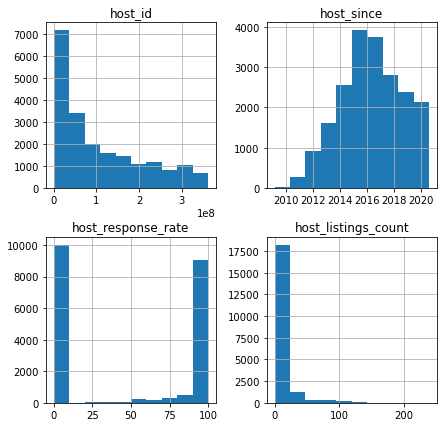

In [412]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Hosts_df.hist(figsize=(7,7))

In [413]:
# Dropping the duplicates in Futuristic_Airbnb_Hosts_df data frame

Futuristic_Airbnb_Hosts_df = Futuristic_Airbnb_Hosts_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Hosts_df = Futuristic_Airbnb_Hosts_df.reset_index(drop=True)

In [414]:
Futuristic_Airbnb_Hosts_df.head()

,host_id,host_url,host_name,host_about,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_has_profile_pic,host_neighbourhood,host_identity_verified
0,33057,https://www.airbnb.com/users/show/33057,Manju,About us: We are an East Indian couple in our ...,2009-08-21,Australia,Information Not Available,0,False,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,1.0,False,Information Not Available,False
1,38901,https://www.airbnb.com/users/show/38901,Lindsay,As an artist working in animation and video I ...,2009-09-16,"Melbourne, Victoria, Australia",within a few hours,100,False,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,1.0,True,Brunswick,True
2,50121,https://www.airbnb.com/users/show/50121,The A2C Team,Information Not Available,2009-10-31,"Melbourne, Victoria, Australia",Information Not Available,0,False,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,13.0,True,St Kilda,True
3,164193,https://www.airbnb.com/users/show/164193,Daryl & Dee,We are an active couple who work from home and...,2010-07-12,"Berwick, Victoria, Australia",within an hour,100,True,https://a0.muscache.com/im/pictures/user/29c38...,https://a0.muscache.com/im/pictures/user/29c38...,1.0,True,Information Not Available,True
4,182833,https://www.airbnb.com/users/show/182833,Diana,"We all travellers on this planet, if my place ...",2010-07-27,"Melbourne, Victoria, Australia",Information Not Available,0,False,https://a0.muscache.com/im/users/182833/profil...,https://a0.muscache.com/im/users/182833/profil...,3.0,True,Information Not Available,True


In [415]:
#Checking the Number of Rows in Futuristic_Airbnb_Hosts_df
len(Futuristic_Airbnb_Hosts_df)

12960

Creating New data frame for Listing & Property Related Columns

In [416]:
Listings_df.head()



,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,NaN,NaN,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,"['email', 'phone', 'reviews']",f,f,"Bulleen, Victoria, Australia",Manningham,NaN,-37.77268,145.09213,Private room in house,Private room,2,NaN,1.0,2.0,"[""Wifi""]",$60.00,1,365,NaN,t,30,60,90,365,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,0.04
1,10803,https://www.airbnb.com/rooms/10803,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, Victoria, Australia",Moreland,NaN,-37.76651,144.98074,Private room in apartment,Private room,2,NaN,1.0,2.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Lock on bedro...",$31.00,4,14,NaN,t,1,1,1,1,145,16,2013-01-12,2020-04-08,89.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1.57
2,12936,https://www.airbnb.com/rooms/12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,50121,https://www.airbnb.com/users/show/50121,The A2C Team,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,96%,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,St Kilda,13.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"St Kilda, Victoria, Australia",Port Phillip,NaN,-37.85999,144.97662,Entire apartment,Entire home/apt,2,NaN,1.0,1.0,"[""Stove"", ""TV"", ""Dishes and silverware"", ""Air ...",$95.00,3,14,NaN,t,0,0,0,0,42,12,2010-08-04,2020-03-15,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,0.34
3,38271,https://www.airbnb.com/rooms/38271,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,Our street is quiet & secluded but within walk...,164193,https://www.airbnb.com/users/show/164193,Daryl & Dee,2010-07-12,"Berwick, Victoria, Australia",We are an active couple who work from home and...,within an hour,100%,90%,t,https://a0.muscache.com/im/pictures/user/29c38...,https://a0.muscache.com/im/pictures/user/29c38...,NaN,1.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Berwick, Victoria, Australia",Casey,NaN,-38.05725,145.33936,Entire apartment,Entire home/apt,5,NaN,3.0,3.0,"[""TV"", ""Free parking on premises"", ""Breakfast""...",$99.00,1,14,NaN,t,7,34,64,329,149,18,2010-11-24,2020-05-16,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1.26
4,41836,https://www.airbnb.com/rooms/41836,CLOSE TO CITY & MELBOURNE AIRPORT,Easy to

In [417]:
Futuristic_Airbnb_Listings_Property_df=Listings_df[['id','host_id','listing_url','name','neighborhood_overview',
                                                    'description',
                                                    'property_type','room_type','accommodates','bathrooms',
                                                    'bedrooms','beds','amenities','price', 'instant_bookable',
                                                    'minimum_nights','maximum_nights','license',
                                                    'host_has_profile_pic','host_identity_verified']].copy()

In [418]:
Futuristic_Airbnb_Listings_Property_df.head()

,id,host_id,listing_url,name,neighborhood_overview,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,instant_bookable,minimum_nights,maximum_nights,license,host_has_profile_pic,host_identity_verified
0,9835,33057,https://www.airbnb.com/rooms/9835,Beautiful Room & House,Very safe! Family oriented. Older age group.,"<b>The space</b><br />House: Clean, New, Moder...",Private room in house,Private room,2,NaN,1.0,2.0,"[""Wifi""]",$60.00,f,1,365,NaN,f,f
1,10803,38901,https://www.airbnb.com/rooms/10803,Room in Cool Deco Apartment in Brunswick East,This hip area is a crossroads between two grea...,A large air conditioned room with queen spring...,Private room in apartment,Private room,2,NaN,1.0,2.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Lock on bedro...",$31.00,f,4,14,NaN,t,t
2,12936,50121,https://www.airbnb.com/rooms/12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,A stay at our apartment means you can enjoy so...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,Entire apartment,Entire home/apt,2,NaN,1.0,1.0,"[""Stove"", ""TV"", ""Dishes and silverware"", ""Air ...",$95.00,f,3,14,NaN,t,t
3,38271,164193,https://www.airbnb.com/rooms/38271,Melbourne - Old Trafford Apartment,Our street is quiet & secluded but within walk...,Please note: No booking will be accepted with ...,Entire apartment,Entire home/apt,5,NaN,3.0,3.0,"[""TV"", ""Free parking on premises"", ""Breakfast""...",$99.00,f,1,14,NaN,t,t
4,41836,182833,https://www.airbnb.com/rooms/41836,CLOSE TO CITY & MELBOURNE AIRPORT,"The neighbours are quiet and friendly, please...",Easy to travel from and to the Airport; quiet ...,Private room in house,Private room,2,NaN,1.0,1.0,"[""Hangers"", ""Essentials"", ""Washer"", ""TV"", ""Fre...",$40.00,f,7,365,NaN,t,t


In [419]:
len(Futuristic_Airbnb_Listings_Property_df)

20420

In [420]:
#Determining the Percentage of Null Value Data
round(( Futuristic_Airbnb_Listings_Property_df.isna().sum()/len(Futuristic_Airbnb_Listings_Property_df) ) * 100).sort_values(ascending=False)

license                   100.0
bathrooms                 100.0
neighborhood_overview      35.0
bedrooms                    4.0
description                 4.0
beds                        1.0
amenities                   0.0
host_has_profile_pic        0.0
maximum_nights              0.0
minimum_nights              0.0
instant_bookable            0.0
price                       0.0
id                          0.0
host_id                     0.0
accommodates                0.0
room_type                   0.0
property_type               0.0
name                        0.0
listing_url                 0.0
host_identity_verified      0.0
dtype: float64

In [421]:
Futuristic_Airbnb_Listings_Property_df.update(Futuristic_Airbnb_Listings_Property_df[["license","bathrooms","bedrooms","beds", "neighborhood_overview",
"description"]].fillna("Information Not Available"))

In [422]:
#Re-Checking
round(( Futuristic_Airbnb_Listings_Property_df.isna().sum()/len(Futuristic_Airbnb_Listings_Property_df) ) * 100).sort_values(ascending=False)

id                        0.0
host_id                   0.0
host_has_profile_pic      0.0
license                   0.0
maximum_nights            0.0
minimum_nights            0.0
instant_bookable          0.0
price                     0.0
amenities                 0.0
beds                      0.0
bedrooms                  0.0
bathrooms                 0.0
accommodates              0.0
room_type                 0.0
property_type             0.0
description               0.0
neighborhood_overview     0.0
name                      0.0
listing_url               0.0
host_identity_verified    0.0
dtype: float64

In [423]:
Futuristic_Airbnb_Listings_Property_df["price"] = pd.to_numeric(Futuristic_Airbnb_Listings_Property_df["price"].replace({'\$': '', ',': ''}, regex=True))

In [424]:
Futuristic_Airbnb_Listings_Property_df.amenities.head()

0                                             ["Wifi"]
1    ["Coffee maker", "Stove", "TV", "Lock on bedro...
2    ["Stove", "TV", "Dishes and silverware", "Air ...
3    ["TV", "Free parking on premises", "Breakfast"...
4    ["Hangers", "Essentials", "Washer", "TV", "Fre...
Name: amenities, dtype: object

In [425]:
Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace("[",'')
Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace('"','')
Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace(']','')

C:\Users\61406\AppData\Local\Temp\ipykernel_35972\2256721905.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace("[",'')
C:\Users\61406\AppData\Local\Temp\ipykernel_35972\2256721905.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace(']','')


In [426]:
Futuristic_Airbnb_Listings_Property_df["amenities"].replace(['[','"',']'],['','',''],inplace=True)

In [427]:
Futuristic_Airbnb_Listings_Property_df["amenities"].head()

0                                                 Wifi
1    Coffee maker, Stove, TV, Lock on bedroom door,...
2    Stove, TV, Dishes and silverware, Air conditio...
3    TV, Free parking on premises, Breakfast, Host ...
4    Hangers, Essentials, Washer, TV, Free parking ...
Name: amenities, dtype: object

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>],
       [<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>]], dtype=object)

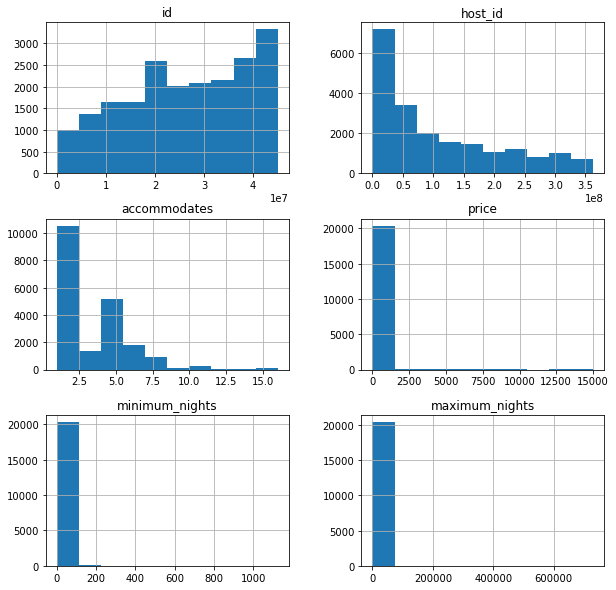

In [428]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Listings_Property_df.hist(figsize=(10,10))

In [429]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Listings_Property_df["instant_bookable"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["license"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["host_has_profile_pic"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["host_identity_verified"].replace(["t","f"],[True,False],inplace=True)

In [430]:
#Renaming id to Listing_id
Futuristic_Airbnb_Listings_Property_df=Futuristic_Airbnb_Listings_Property_df.rename(columns={"id":"listing_id"})

In [431]:
# Dropping the duplicates in Futuristic_Airbnb_Hosts_df data frame

Futuristic_Airbnb_Listings_Property_df = Futuristic_Airbnb_Listings_Property_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Listings_Property_df = Futuristic_Airbnb_Listings_Property_df.reset_index(drop=True)

In [432]:
Futuristic_Airbnb_Listings_Property_df.head()

,listing_id,host_id,listing_url,name,neighborhood_overview,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,instant_bookable,minimum_nights,maximum_nights,license,host_has_profile_pic,host_identity_verified
0,9835,33057,https://www.airbnb.com/rooms/9835,Beautiful Room & House,Very safe! Family oriented. Older age group.,"<b>The space</b><br />House: Clean, New, Moder...",Private room in house,Private room,2,Information Not Available,1.0,2.0,Wifi,60.0,False,1,365,Information Not Available,False,False
1,10803,38901,https://www.airbnb.com/rooms/10803,Room in Cool Deco Apartment in Brunswick East,This hip area is a crossroads between two grea...,A large air conditioned room with queen spring...,Private room in apartment,Private room,2,Information Not Available,1.0,2.0,"Coffee maker, Stove, TV, Lock on bedroom door,...",31.0,False,4,14,Information Not Available,True,True
2,12936,50121,https://www.airbnb.com/rooms/12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,A stay at our apartment means you can enjoy so...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,Entire apartment,Entire home/apt,2,Information Not Available,1.0,1.0,"Stove, TV, Dishes and silverware, Air conditio...",95.0,False,3,14,Information Not Available,True,True
3,38271,164193,https://www.airbnb.com/rooms/38271,Melbourne - Old Trafford Apartment,Our street is quiet & secluded but within walk...,Please note: No booking will be accepted with ...,Entire apartment,Entire home/apt,5,Information Not Available,3.0,3.0,"TV, Free parking on premises, Breakfast, Host ...",99.0,False,1,14,Information Not Available,True,True
4,41836,182833,https://www.airbnb.com/rooms/41836,CLOSE TO CITY & MELBOURNE AIRPORT,"The neighbours are quiet and friendly, please...",Easy to travel from and to the Airport; quiet ...,Private room in house,Private room,2,Information Not Available,1.0,1.0,"Hangers, Essentials, Washer, TV, Free parking ...",40.0,False,7,365,Information Not Available,True,True


Creating New data frame for Property Address Columns

In [433]:
Futuristic_Airbnb_Property_Address_df = Listings_df[['id', 'host_url', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'host_location', 'host_neighbourhood',
       'latitude', 'longitude']].copy()

In [434]:
Futuristic_Airbnb_Property_Address_df.head()

,id,host_url,neighbourhood_cleansed,neighbourhood_group_cleansed,host_location,host_neighbourhood,latitude,longitude
0,9835,https://www.airbnb.com/users/show/33057,Manningham,NaN,AU,NaN,-37.77268,145.09213
1,10803,https://www.airbnb.com/users/show/38901,Moreland,NaN,"Melbourne, Victoria, Australia",Brunswick,-37.76651,144.98074
2,12936,https://www.airbnb.com/users/show/50121,Port Phillip,NaN,"Melbourne, Victoria, Australia",St Kilda,-37.85999,144.97662
3,38271,https://www.airbnb.com/users/show/164193,Casey,NaN,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936
4,41836,https://www.airbnb.com/users/show/182833,Darebin,NaN,"Melbourne, Victoria, Australia",NaN,-37.69729,145.00082


In [435]:
len(Futuristic_Airbnb_Property_Address_df)

20420

In [436]:
#Determining the Null Value Data
round(( Futuristic_Airbnb_Property_Address_df.isna().sum()/len(Futuristic_Airbnb_Property_Address_df) ) * 100).sort_values(ascending=False)

neighbourhood_group_cleansed    100.0
host_neighbourhood               42.0
id                                0.0
host_url                          0.0
neighbourhood_cleansed            0.0
host_location                     0.0
latitude                          0.0
longitude                         0.0
dtype: float64

In [437]:
# Dropping the duplicates in Futuristic_Airbnb_Property_Address_df data frame

Futuristic_Airbnb_Property_Address_df = Futuristic_Airbnb_Property_Address_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Property_Address_df = Futuristic_Airbnb_Property_Address_df.reset_index(drop=True)

In [438]:
Futuristic_Airbnb_Property_Address_df.head()

,id,host_url,neighbourhood_cleansed,neighbourhood_group_cleansed,host_location,host_neighbourhood,latitude,longitude
0,9835,https://www.airbnb.com/users/show/33057,Manningham,NaN,AU,NaN,-37.77268,145.09213
1,10803,https://www.airbnb.com/users/show/38901,Moreland,NaN,"Melbourne, Victoria, Australia",Brunswick,-37.76651,144.98074
2,12936,https://www.airbnb.com/users/show/50121,Port Phillip,NaN,"Melbourne, Victoria, Australia",St Kilda,-37.85999,144.97662
3,38271,https://www.airbnb.com/users/show/164193,Casey,NaN,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936
4,41836,https://www.airbnb.com/users/show/182833,Darebin,NaN,"Melbourne, Victoria, Australia",NaN,-37.69729,145.00082


Creating New data frame for Property Availability Columns

In [439]:
Futuristic_Airbnb_Property_Availability_df = Listings_df[["id","has_availability","availability_30","availability_60",
                                                          "availability_90","availability_365"]].copy()
Futuristic_Airbnb_Property_Availability_df.head()

,id,has_availability,availability_30,availability_60,availability_90,availability_365
0,9835,t,30,60,90,365
1,10803,t,1,1,1,1
2,12936,t,0,0,0,0
3,38271,t,7,34,64,329
4,41836,t,0,0,0,0


In [440]:
len(Futuristic_Airbnb_Property_Availability_df)

20420

In [441]:
#Checking if any Null Value Data in Property Availability Related Columns
round(( Futuristic_Airbnb_Property_Availability_df.isna().sum()/len(Futuristic_Airbnb_Property_Availability_df) ) * 100).sort_values(ascending=False)

id                  0.0
has_availability    0.0
availability_30     0.0
availability_60     0.0
availability_90     0.0
availability_365    0.0
dtype: float64

In [442]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Property_Availability_df["has_availability"].replace(["t","f"],[True,False],inplace=True)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'availability_30'}>],
       [<AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'availability_90'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

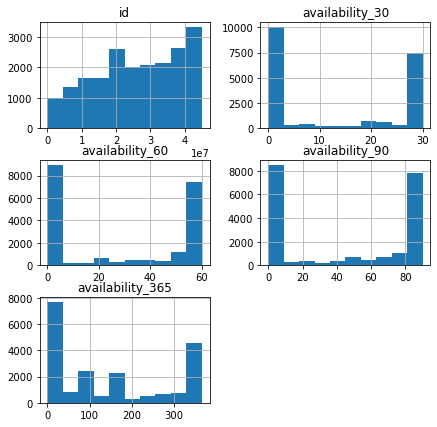

In [443]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Property_Availability_df.hist(figsize=(7,7))

In [444]:
# Dropping the duplicates in Futuristic_Airbnb_Property_Availability_df data frame

Futuristic_Airbnb_Property_Availability_df = Futuristic_Airbnb_Property_Availability_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Property_Availability_df = Futuristic_Airbnb_Property_Availability_df.reset_index(drop=True)

In [445]:
Futuristic_Airbnb_Property_Availability_df.head()

,id,has_availability,availability_30,availability_60,availability_90,availability_365
0,9835,True,30,60,90,365
1,10803,True,1,1,1,1
2,12936,True,0,0,0,0
3,38271,True,7,34,64,329
4,41836,True,0,0,0,0


In [446]:
#Checking the Number of Rows in Futuristic_Airbnb_Hosts_df
len(Futuristic_Airbnb_Property_Availability_df)

20420

Store Reviews CSV into DataFrame

In [447]:
Reviews_df =  pd.read_csv("reviews.csv", encoding="utf8")
Reviews_df = Reviews_df.rename(columns={'id':'review_id','date':'review_date'})
Reviews_df.head()

,listing_id,review_id,review_date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...


Copying the Reviews Related Columns from Listings_df

In [448]:
Listings_Reviews_df = Listings_df[["id","number_of_reviews","number_of_reviews_ltm","first_review","last_review","review_scores_rating","review_scores_accuracy",
                                  "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
                                  "reviews_per_month"]].copy()
Listings_Reviews_df = Listings_Reviews_df.rename(columns={'id':'listing_id'})
Listings_Reviews_df.head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04
1,10803,145,16,2013-01-12,2020-04-08,89.0,10.0,8.0,10.0,10.0,10.0,10.0,1.57
2,12936,42,12,2010-08-04,2020-03-15,94.0,10.0,9.0,10.0,10.0,10.0,9.0,0.34
3,38271,149,18,2010-11-24,2020-05-16,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.26
4,41836,160,2,2011-05-19,2019-09-19,94.0,10.0,9.0,10.0,9.0,9.0,9.0,1.42


In [449]:
Futuristic_Airbnb_Property_Reviews_df = pd.merge(Listings_Reviews_df, Reviews_df, on='listing_id',how ='inner')
Futuristic_Airbnb_Property_Reviews_df.head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_id,review_date,reviewer_id,reviewer_name,comments
0,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,145,16,2013-01-12,2020-04-08,89.0,10.0,8.0,10.0,10.0,10.0,10.0,1.57,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...


In [450]:
len(Futuristic_Airbnb_Property_Reviews_df)

524937

In [451]:
#Determining the Null Value Data from the Calendar dataset
round(( Futuristic_Airbnb_Property_Reviews_df.isna().sum()/len(Futuristic_Airbnb_Property_Reviews_df) ) * 100).sort_values(ascending=False)

review_scores_communication    1.0
review_scores_value            1.0
review_scores_accuracy         1.0
review_scores_cleanliness      1.0
review_scores_checkin          1.0
review_scores_location         1.0
reviewer_name                  0.0
reviewer_id                    0.0
review_date                    0.0
review_id                      0.0
reviews_per_month              0.0
listing_id                     0.0
number_of_reviews              0.0
review_scores_rating           0.0
last_review                    0.0
first_review                   0.0
number_of_reviews_ltm          0.0
comments                       0.0
dtype: float64

In [452]:
# Converting first_review , last_review & review_date to datetime
Futuristic_Airbnb_Property_Reviews_df['first_review'] = pd.to_datetime(Futuristic_Airbnb_Property_Reviews_df['first_review'])
Futuristic_Airbnb_Property_Reviews_df['last_review'] = pd.to_datetime(Futuristic_Airbnb_Property_Reviews_df['last_review'])
Futuristic_Airbnb_Property_Reviews_df['review_date'] = pd.to_datetime(Futuristic_Airbnb_Property_Reviews_df['review_date'])

array([[<AxesSubplot:title={'center':'listing_id'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:title={'center':'first_review'}>],
       [<AxesSubplot:title={'center':'last_review'}>,
        <AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>],
       [<AxesSubplot:title={'center':'review_scores_checkin'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'review_id'}>,
        <AxesSubplot:title={'center':'review_date'}>,
        <AxesSubplot:title={'center':'reviewer_id'}>]], dtype=object)

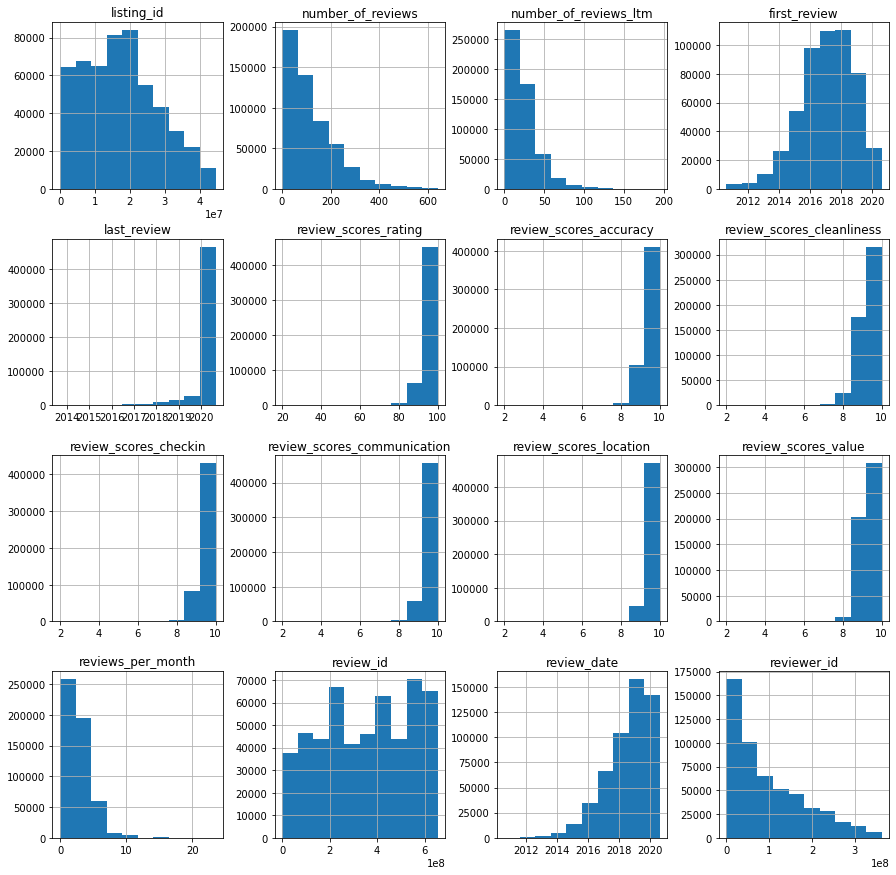

In [453]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Property_Reviews_df.hist(figsize=(15,15))

In [454]:
#Cleaning Reviwer_name & comments column
Futuristic_Airbnb_Property_Reviews_df['reviewer_name']=[re.sub('[^a-zA-Z]+', ' ' ,item) for item in Futuristic_Airbnb_Property_Reviews_df['reviewer_name']]
Futuristic_Airbnb_Property_Reviews_df['comments'] = [re.sub('[^a-zA-Z]+',' ',str(i)) for i in Futuristic_Airbnb_Property_Reviews_df['comments']]

In [455]:
#Dropping duplicates
Futuristic_Airbnb_Property_Reviews_df= Futuristic_Airbnb_Property_Reviews_df.drop_duplicates()
Futuristic_Airbnb_Property_Reviews_df = Futuristic_Airbnb_Property_Reviews_df.reset_index(drop=True)
Futuristic_Airbnb_Property_Reviews_df.head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_id,review_date,reviewer_id,reviewer_name,comments
0,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,279854,2011-05-24,560832,Miriam,Very hospitable much appreciated
1,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,0.04,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,145,16,2013-01-12,2020-04-08,89.0,10.0,8.0,10.0,10.0,10.0,10.0,1.57,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay s ap...


Store calendar CSV into DataFrame

In [456]:
Original_calendar_df = pd.read_csv("calendar.csv", encoding="utf8")

Original_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,875444,2020-08-20,t,$75.00,$75.00,4.0,1124.0
1,875444,2020-08-21,t,$81.00,$81.00,4.0,1124.0
2,875444,2020-08-22,t,$81.00,$81.00,4.0,1124.0
3,875444,2020-08-23,t,$75.00,$75.00,4.0,1124.0
4,875444,2020-08-24,t,$75.00,$75.00,4.0,1124.0


In [457]:
Futuristic_Airbnb_calendar_df=Original_calendar_df[['listing_id','date','available','price','adjusted_price',
                                                    'minimum_nights','maximum_nights']].copy()
Futuristic_Airbnb_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,875444,2020-08-20,t,$75.00,$75.00,4.0,1124.0
1,875444,2020-08-21,t,$81.00,$81.00,4.0,1124.0
2,875444,2020-08-22,t,$81.00,$81.00,4.0,1124.0
3,875444,2020-08-23,t,$75.00,$75.00,4.0,1124.0
4,875444,2020-08-24,t,$75.00,$75.00,4.0,1124.0


In [458]:
#Determining the Null Value Data from the Calendar dataset
round(( Futuristic_Airbnb_calendar_df.isna().sum()/len(Futuristic_Airbnb_calendar_df) ) * 100).sort_values(ascending=False)

listing_id        0.0
date              0.0
available         0.0
price             0.0
adjusted_price    0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64

In [459]:
#Price Column Data cleanup
Futuristic_Airbnb_calendar_df["price"] = pd.to_numeric( Futuristic_Airbnb_calendar_df["price"].replace({'\$': '', ',': ''}, regex=True))
Futuristic_Airbnb_calendar_df["adjusted_price"] = pd.to_numeric( Futuristic_Airbnb_calendar_df["adjusted_price"].replace({'\$': '', ',': ''}, regex=True))

In [460]:
#Data Cleanup for date Column : Converting to DateTime Column

Futuristic_Airbnb_calendar_df.date = pd.to_datetime(Futuristic_Airbnb_calendar_df.date)

array([[<AxesSubplot:title={'center':'listing_id'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'adjusted_price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>]], dtype=object)

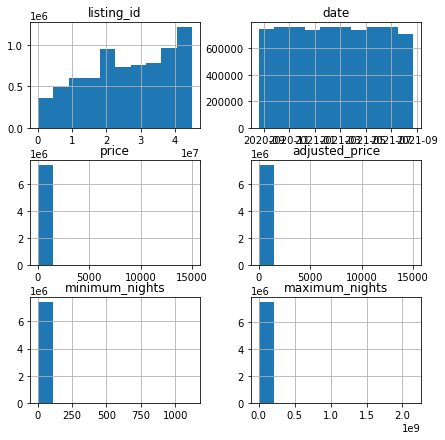

In [461]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_calendar_df.hist(figsize=(7,7))

In [462]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_calendar_df["available"].replace(["t","f"],[True,False],inplace=True)

In [463]:
# Dropping the duplicates in Futuristic_Airbnb_calendar_df data frame

Futuristic_Airbnb_calendar_df = Futuristic_Airbnb_calendar_df.drop_duplicates(keep="first")

Futuristic_Airbnb_calendar_df = Futuristic_Airbnb_calendar_df.reset_index(drop=True)
Futuristic_Airbnb_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,875444,2020-08-20,True,75.0,75.0,4.0,1124.0
1,875444,2020-08-21,True,81.0,81.0,4.0,1124.0
2,875444,2020-08-22,True,81.0,81.0,4.0,1124.0
3,875444,2020-08-23,True,75.0,75.0,4.0,1124.0
4,875444,2020-08-24,True,75.0,75.0,4.0,1124.0


In [465]:
g_key = "**************************"
gmaps.configure(api_key=g_key)

In [466]:

api_key='**********************************************************'
headers = {'Authorization': 'Bearer %s' % api_key}
url='https://api.yelp.com/v3/businesses/search'